In [1]:
import os
import math
import numpy as np
import pandas as pd

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


import matplotlib.pyplot as plt

from statsmodels.tsa.arima_model import ARIMA

from pmdarima.arima import auto_arima

import torch
import torch.nn as nn

In [2]:
current_path = os.getcwd()
meme_stocks = ["RIVN", "BB", "SOFI", "GME", "AMC", "PLTR"]

stock_data = {}

for stock in meme_stocks:
    try:
        file_path = f"{current_path}/meme_stocks/{stock}_price_data.csv"
        data = pd.read_csv(file_path, index_col='Date', parse_dates=True)
        
        data['Amount'] = (data['Open'] + data['High'] + data['Low'] + data['Close']) / 4 * data['Volume']
        
        stock_data[stock] = data

    except Exception as e:
        print(f"Error loading data for {stock}: {str(e)}")

In [3]:
stock_data['RIVN'].index

DatetimeIndex(['2021-11-10', '2021-11-11', '2021-11-12', '2021-11-15',
               '2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19',
               '2021-11-22', '2021-11-23',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=287, freq=None)

## 1. Linear Regression

Stock: RIVN
Mean Squared Error: 0.2798465029096094
R-squared: 0.988440116811897


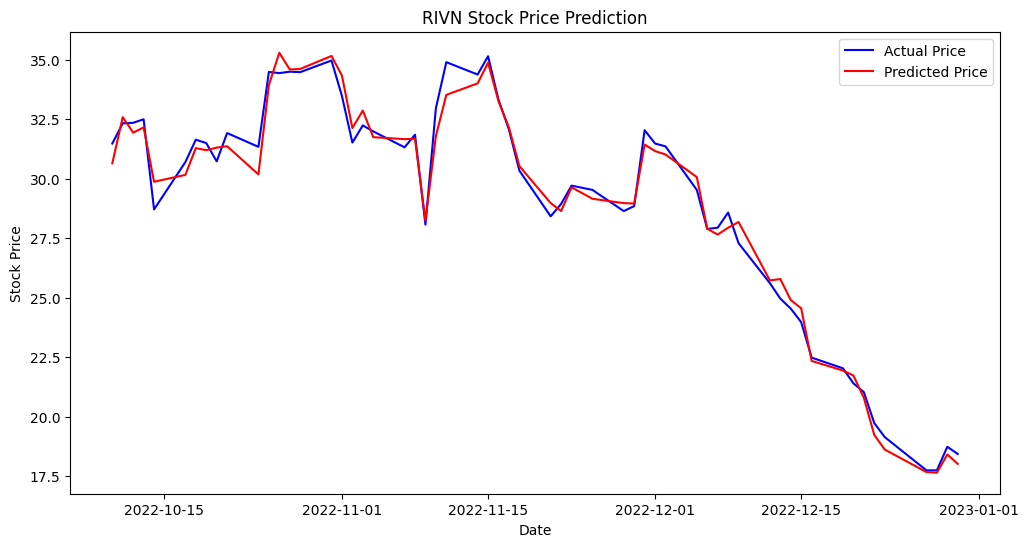

Stock: BB
Mean Squared Error: 0.010163774190928848
R-squared: 0.9973474772672312


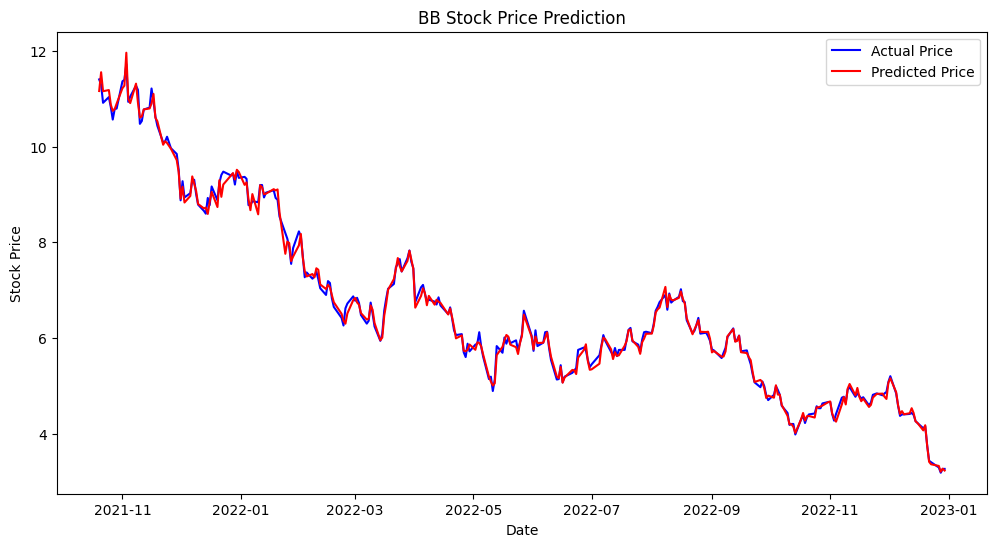

Stock: SOFI
Mean Squared Error: 0.008387151564363227
R-squared: 0.9877548379025918


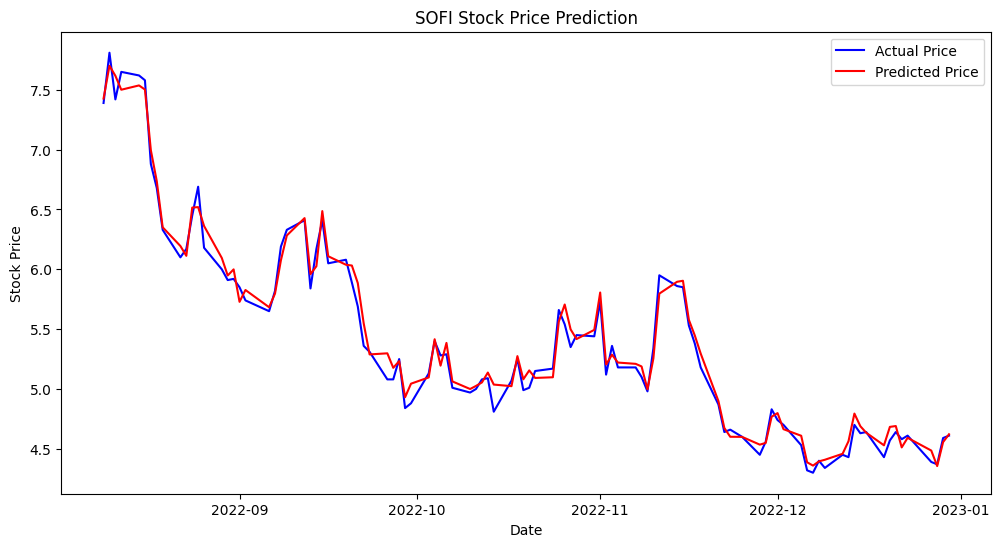

Stock: GME
Mean Squared Error: 0.7843898852996103
R-squared: 0.988954639995328


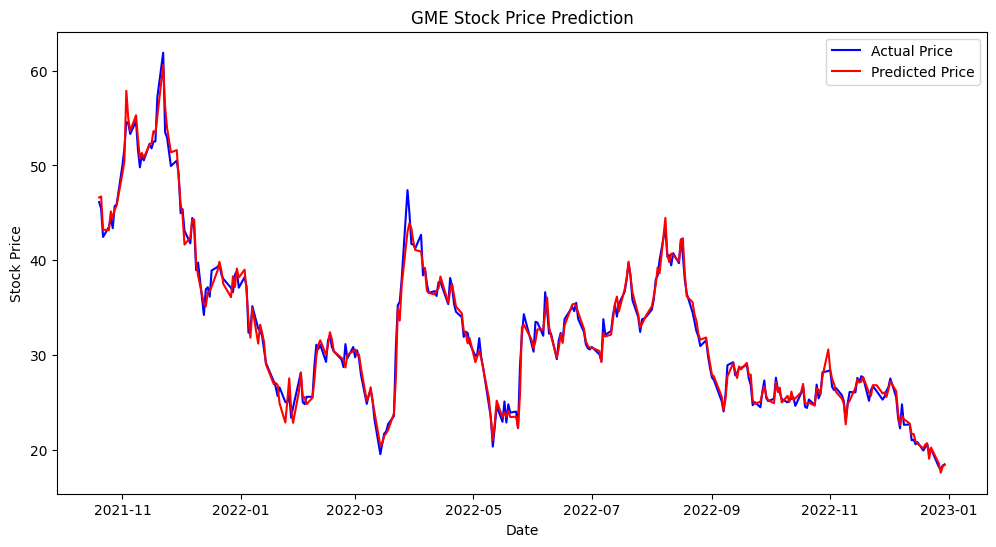

Stock: AMC
Mean Squared Error: 26.620362690889696
R-squared: 0.9972153383234832


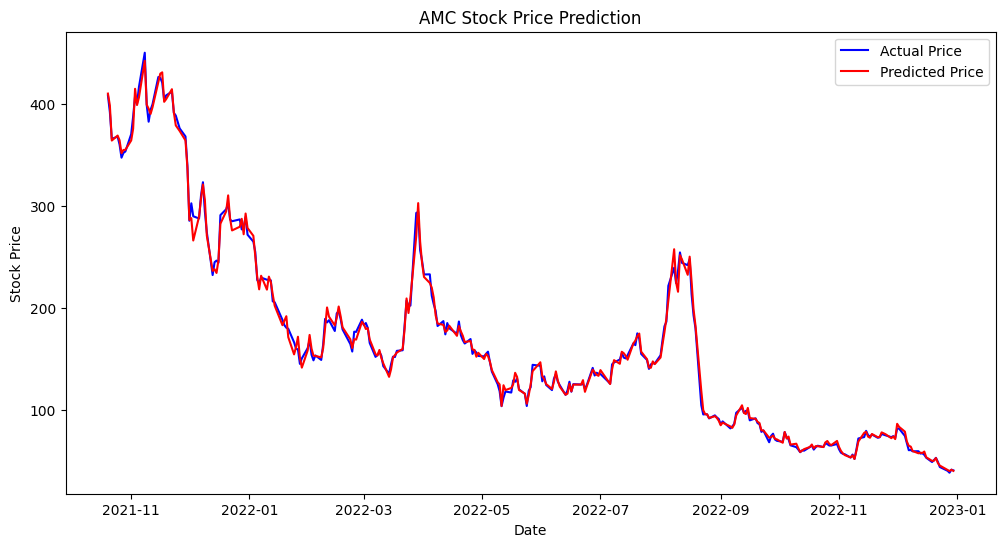

Stock: PLTR
Mean Squared Error: 0.015857826009196163
R-squared: 0.9877830732645991


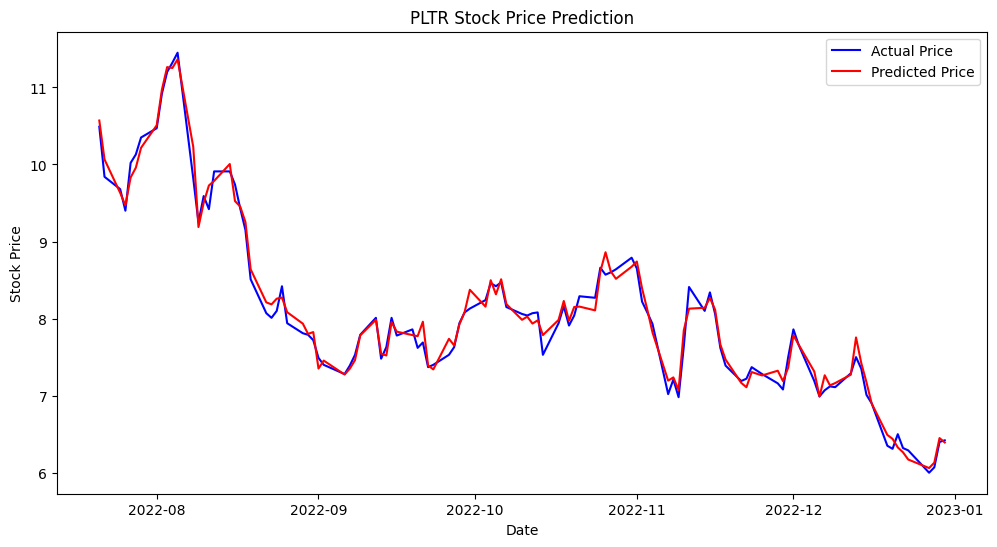

In [4]:
for stock, data in stock_data.items():
    train_size = int(0.8 * len(data))
    train_data = data[:train_size]
    test_data = data[train_size:]

    X_train = train_data[['Open', 'High', 'Low', 'Volume']] # add other variables not related to 'Close'
    y_train = train_data['Close']
    X_test = test_data[['Open', 'High', 'Low', 'Volume']]
    y_test = test_data['Close']

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Stock: {stock}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    plt.figure(figsize=(12, 6))
    plt.plot(test_data.index, y_test, label='Actual Price', color='blue')
    plt.plot(test_data.index, y_pred, label='Predicted Price', color='red')
    plt.title(f"{stock} Stock Price Prediction")
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

## 2. ARIMA (AutoRegressive Integrated Moving Average) 

In [5]:
def train_arima(stock_data):
    train_size = int(0.8 * len(stock_data))
    train, test = stock_data[:train_size], stock_data[train_size:]

    # perform a search to determine the optimal values for p, d, and q, as well as other parameters. 
    # The stepwise argument indicates that it should use a stepwise search to find the best model.
    # The best model will be automatically selected based on the AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion) criteria.
    model = auto_arima(train, seasonal=False, stepwise=True, suppress_warnings=True, error_action="ignore")
    
    predictions = model.predict(n_periods=len(test), return_conf_int=False)

    mse = mean_squared_error(test, predictions)
    rmse = math.sqrt(mse)

    return predictions, rmse, test


C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Stock: RIVN
Root Mean Squared Error (RMSE): 8.334856616248612


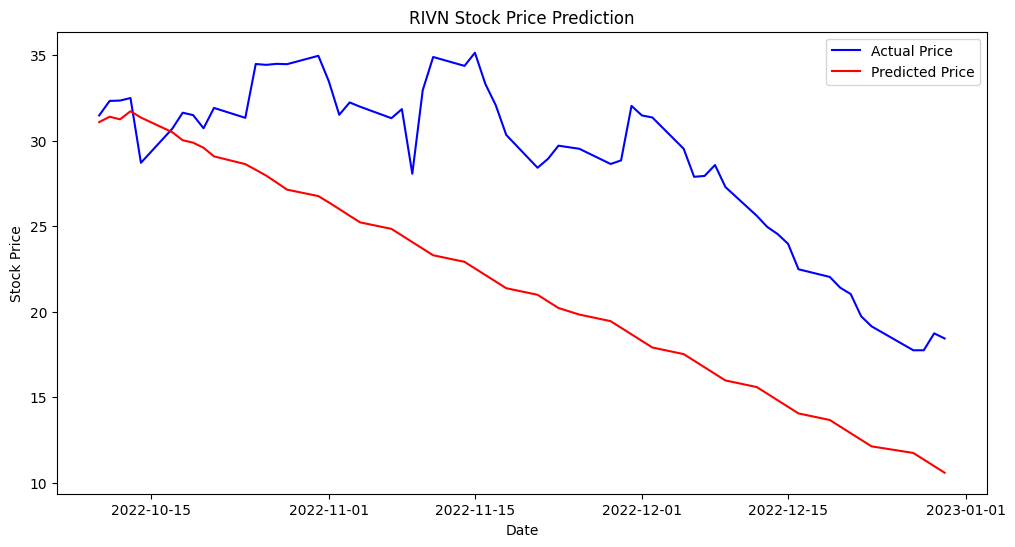

C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Stock: BB
Root Mean Squared Error (RMSE): 4.5235247351689205


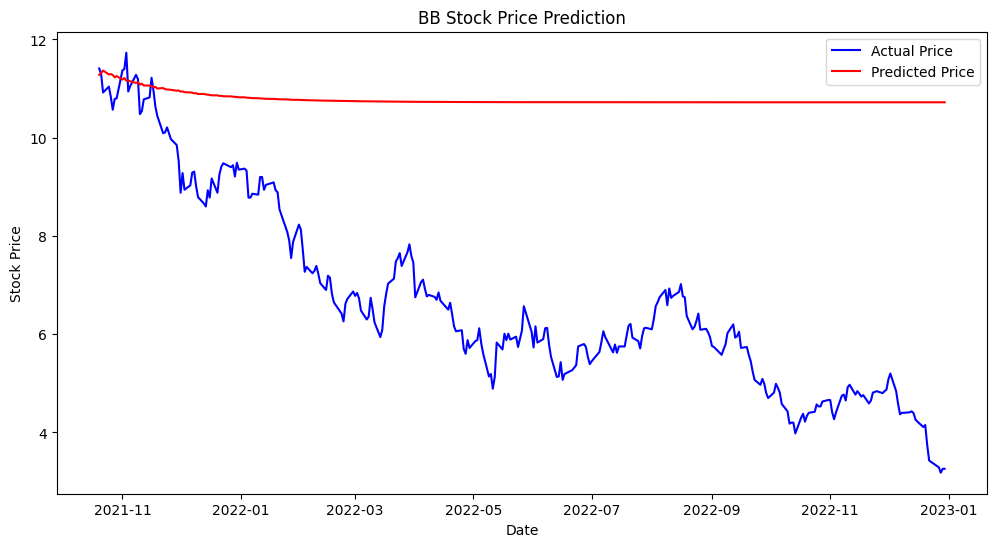

Stock: SOFI
Root Mean Squared Error (RMSE): 2.692902326310314


C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


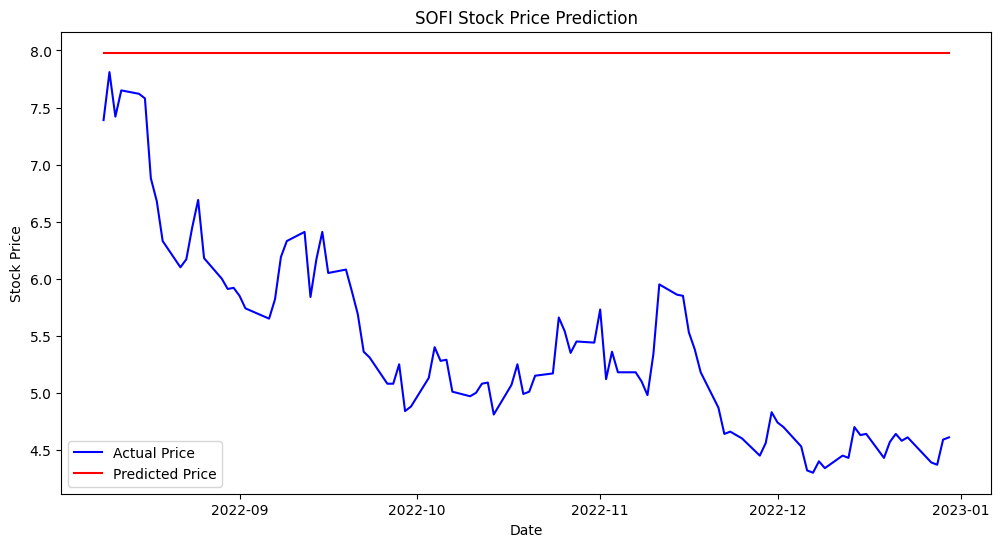

C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Stock: GME
Root Mean Squared Error (RMSE): 16.103135050692853


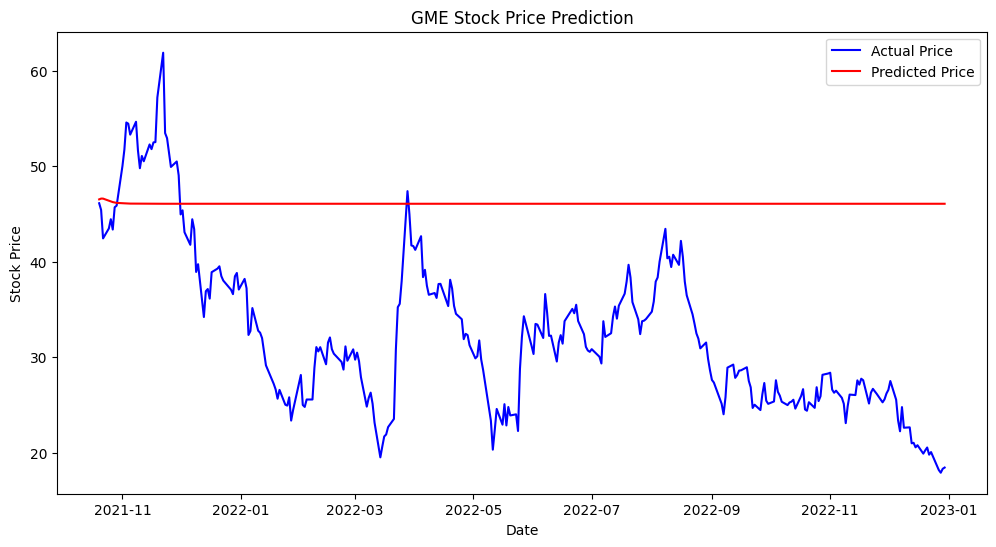

Stock: AMC
Root Mean Squared Error (RMSE): 260.55561154865126


C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


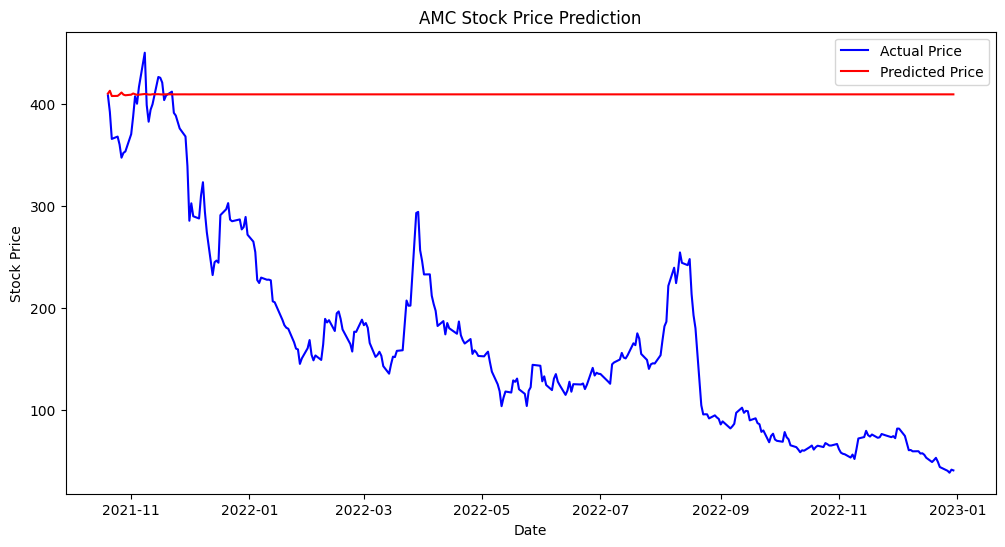

Stock: PLTR
Root Mean Squared Error (RMSE): 2.1595744273388577


C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


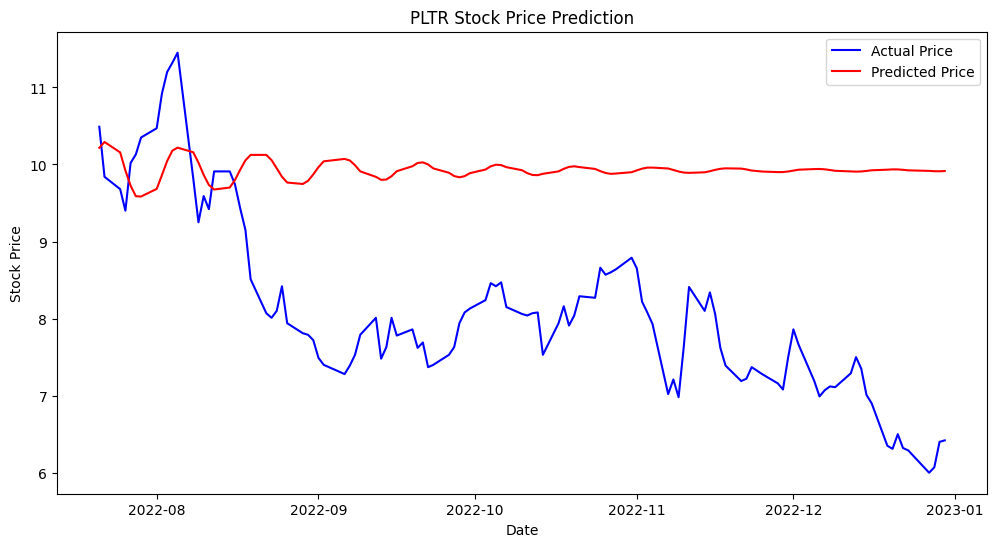

In [6]:
for stock_name in meme_stocks:
    file_path = f"{current_path}/meme_stocks/{stock_name}_price_data.csv"
    stock_data = pd.read_csv(file_path, index_col='Date', parse_dates=True)
    stock_data = stock_data['Close']

    predictions, rmse, test = train_arima(stock_data)

    print(f"Stock: {stock_name}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")

    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index[-len(predictions):], test, label='Actual Price', color='blue')
    plt.plot(stock_data.index[-len(predictions):], predictions, label='Predicted Price', color='red')
    plt.title(f"{stock_name} Stock Price Prediction")
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

## 3. Long Short-Term Memory (LSTM)

In [22]:
input_size = 1  # number of features (stock price)
hidden_size = 64 
num_layers = 3
sequence_length = 10  
num_epochs = 10
learning_rate = 0.001

In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [19]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

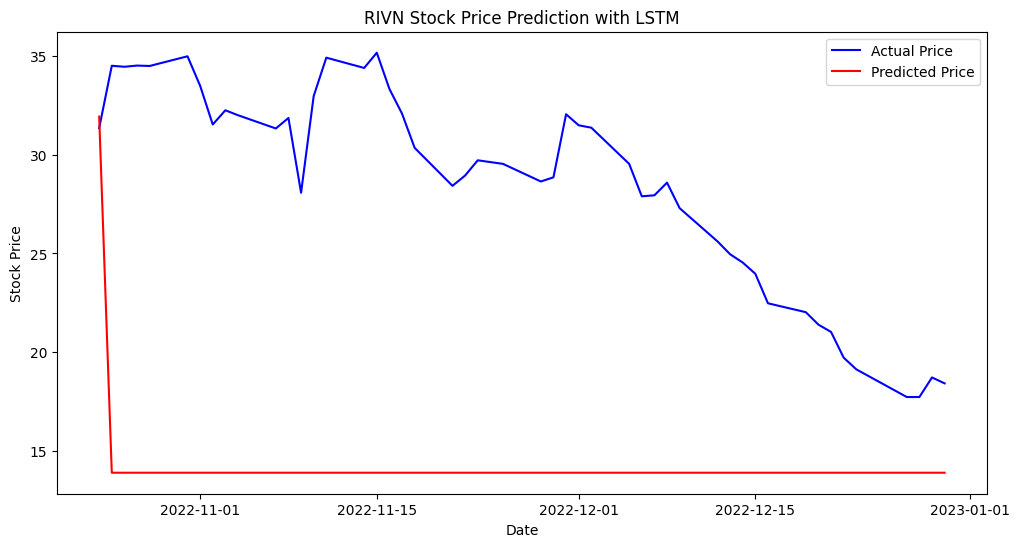

Mean Squared Error (MSE) for RIVN: 243.4707816261425


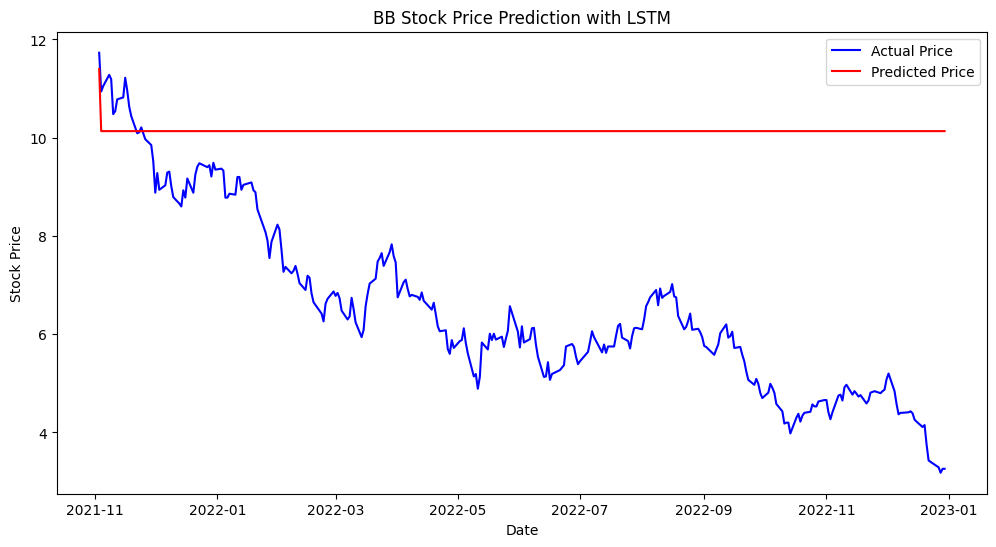

Mean Squared Error (MSE) for BB: 16.345341009245235


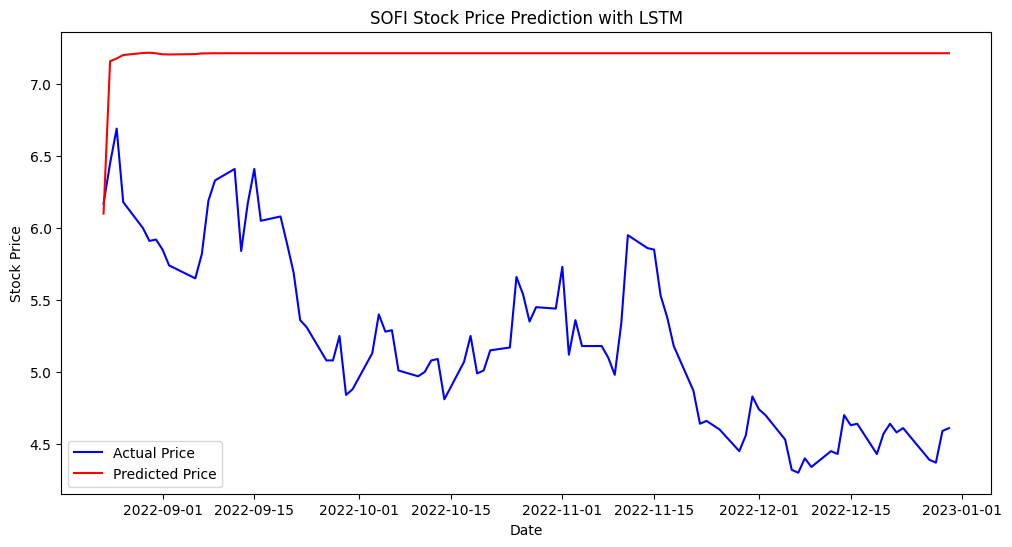

Mean Squared Error (MSE) for SOFI: 4.275513903459907


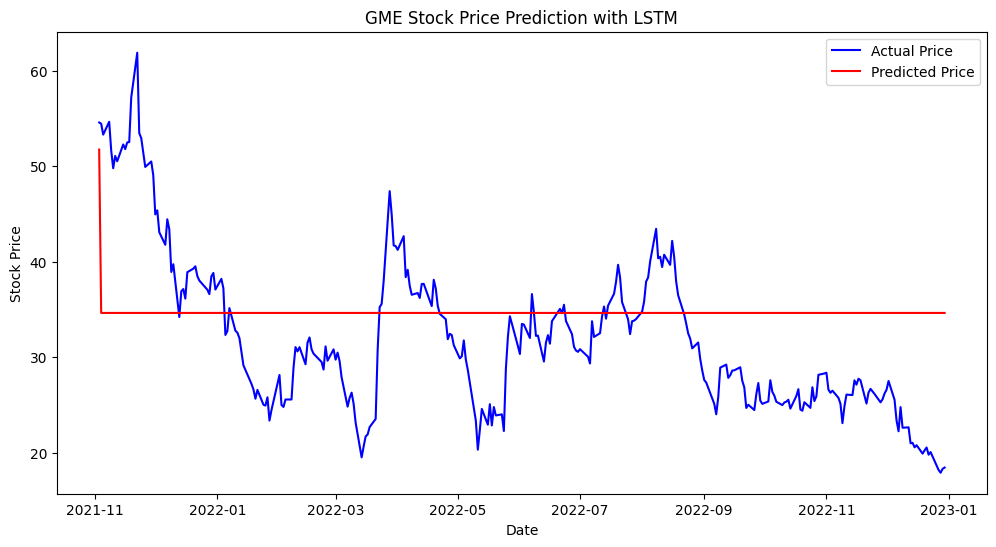

Mean Squared Error (MSE) for GME: 73.66434641106946


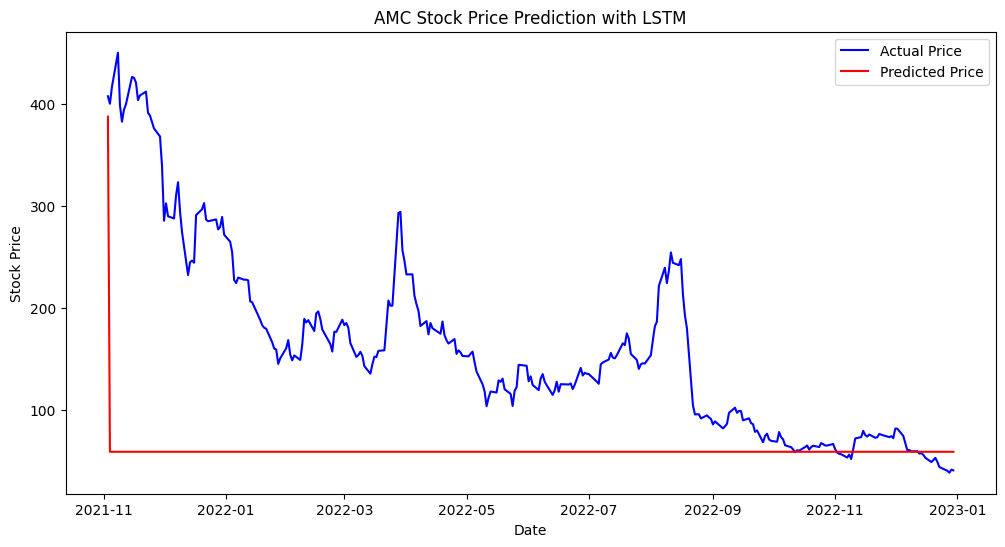

Mean Squared Error (MSE) for AMC: 18954.731393100425


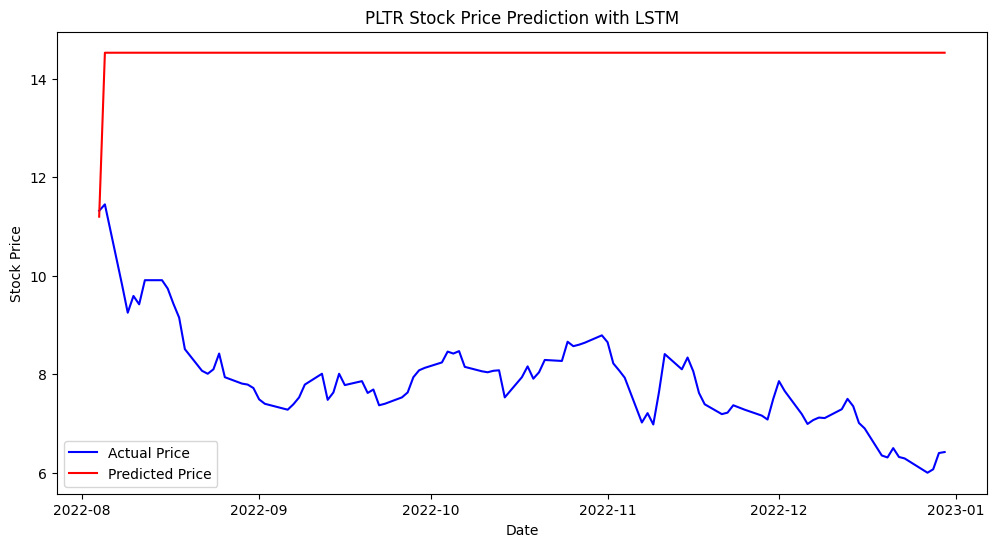

Mean Squared Error (MSE) for PLTR: 44.869657903970605


In [21]:
for stock_name in meme_stocks:
    file_path = f"{current_path}/meme_stocks/{stock_name}_price_data.csv"
    stock_data_df = pd.read_csv(file_path, index_col='Date', parse_dates=True)
    stock_data = stock_data_df['Close']
    original_dates = stock_data_df.index
    

    stock_data = stock_data.values  # Convert to a numpy array
    train_size = int(0.8 * len(stock_data))
    train_data = torch.FloatTensor(stock_data[:train_size]).view(-1)
    test_data = torch.FloatTensor(stock_data[train_size:]).view(-1)

    def create_sequences(data, sequence_length):
        sequences = []
        for i in range(len(data) - sequence_length):
            sequences.append(data[i:i+sequence_length])
        return torch.stack(sequences)

    train_sequences = create_sequences(train_data, sequence_length).to(device)
    test_sequences = create_sequences(test_data, sequence_length).to(device)

    train_loader = torch.utils.data.DataLoader(train_sequences, batch_size=1, shuffle=False)

    model = LSTMModel(input_size, hidden_size, num_layers).to(device)

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    model.train()
    for epoch in range(num_epochs):
        for inputs in train_loader:
            inputs = inputs.view(1, sequence_length, input_size).to(device)
            targets = inputs[:, -1, :].view(1, 1).to(device)

            outputs = model(inputs)
            loss = criterion(outputs, targets)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    model.eval()
    test_inputs = test_sequences[0, :-1].view(1, sequence_length - 1, input_size).to(device)
    test_outputs = []
    for i in range(len(test_sequences) - 1):
        with torch.no_grad():
            output = model(test_inputs)
            test_outputs.append(output.item())
            test_inputs = torch.cat((test_inputs[:, 1:, :], output.view(1, 1, 1)), dim=1)

    # Map the predicted values back to their original dates
    predicted_dates = original_dates[train_size + sequence_length:]
    predicted_prices = [test_data[sequence_length - 1]] + test_outputs

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(test_data[sequence_length:-1].numpy(), np.array(test_outputs))

    # Plot the actual vs. predicted stock prices with original dates
    plt.figure(figsize=(12, 6))
    plt.plot(original_dates[train_size + sequence_length:], test_data[sequence_length:].numpy(), label='Actual Price', color='blue')
    plt.plot(predicted_dates, predicted_prices, label='Predicted Price', color='red')
    plt.title(f"{stock_name} Stock Price Prediction")
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

    print(f"Mean Squared Error (MSE) for {stock_name}: {mse}")



    # # using time steps instead of dates
    # model.eval()
    # test_inputs = test_sequences[0, :-1].view(1, sequence_length - 1, input_size).to(device)
    # test_outputs = []
    # for i in range(len(test_sequences) - 1):
    #     with torch.no_grad():
    #         output = model(test_inputs)
    #         test_outputs.append(output.item())
    #         test_inputs = torch.cat((test_inputs[:, 1:, :], output.view(1, 1, 1)), dim=1)

    # test_outputs = [test_data[sequence_length - 1]] + test_outputs

    # mse = mean_squared_error(test_data[sequence_length:].numpy(), np.array(test_outputs))

    # plt.figure(figsize=(12, 6))
    # plt.plot(test_data[sequence_length:].numpy(), label='Actual Price', color='blue')
    # plt.plot(test_outputs, label='Predicted Price', color='red')
    # plt.title(f"{stock_name} Stock Price Prediction with LSTM")
    # plt.xlabel('Time Steps') # The LSTM model doesn't directly work with dates as inputs. Instead, it works with numerical features at each time step.
    # plt.ylabel('Stock Price')
    # plt.legend()
    # plt.show()

    # print(f"Mean Squared Error (MSE) for {stock_name}: {mse}")